### Discrete Fourier Transform

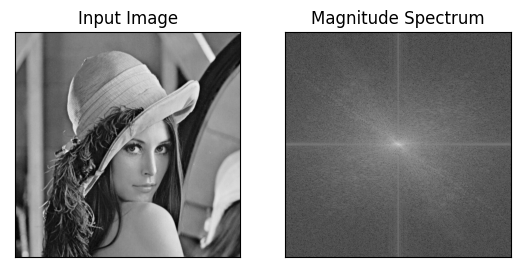

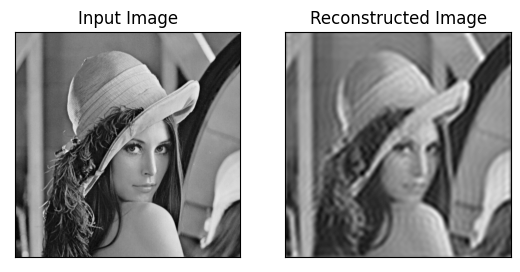

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.png', 0)

# Compute the Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)


magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the input image and its magnitude spectrum
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# Apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Display the input image and the reconstructed image after applying the mask
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()




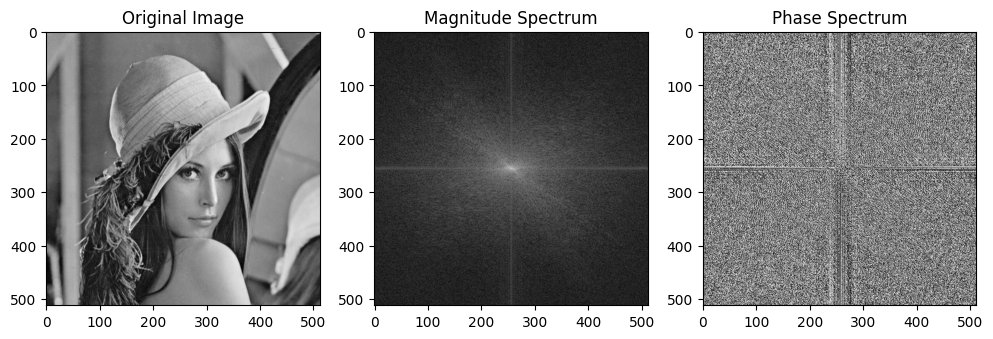

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('lena.png')
gray_img = np.mean(img, axis=-1)


fourier_transform = np.fft.fft2(gray_img)


fourier_transform_shifted = np.fft.fftshift(fourier_transform)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(fourier_transform_shifted)), cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(np.angle(fourier_transform_shifted), cmap='gray')
plt.title('Phase Spectrum')

plt.show()


### Some DFT properties

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Create a 2D image and two coefficients
image1 = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

image2 = np.array([[9,8,7],
                   [6,5,4],
                   [3,2,1]])

a = 2
b = -1


linear_combination_spatial = a * image1 + b * image2

image_fft = fft2(linear_combination_spatial)



#### Linearity

In [7]:
image_fft

array([[ 45.  +0.j        , -13.5 +7.79422863j, -13.5 -7.79422863j],
       [-40.5+23.3826859j ,   0.  +0.j        ,   0.  +0.j        ],
       [-40.5-23.3826859j ,   0.  +0.j        ,   0.  +0.j        ]])

In [9]:
a*fft2(image1)+b*fft2(image2)

array([[ 45.  +0.j        , -13.5 +7.79422863j, -13.5 -7.79422863j],
       [-40.5+23.3826859j ,   0.  +0.j        ,   0.  +0.j        ],
       [-40.5-23.3826859j ,   0.  +0.j        ,   0.  +0.j        ]])

#### Separability

In [11]:
import numpy as np

def fft2d(data):
    data_row_fft = np.fft.fft(data, axis=1)

    data_fft2d = np.fft.fft(data_row_fft, axis=0)

    return data_fft2d

image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

result_fft2d = fft2d(image)

# Print the result
print("Original Image:")
print(image)
print("2D DFT:")
print(np.fft.fft2(image))
print("\n2D DFT using Row-Column Decomposition:")
print(result_fft2d)


Original Image:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
2D DFT:
[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]

2D DFT using Row-Column Decomposition:
[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]


#### Rotation

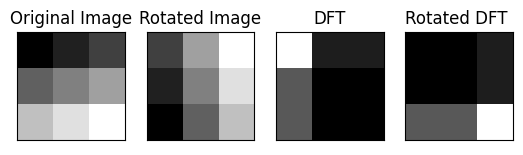

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from scipy.fft import fft2, ifft2, fftshift

image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

theta = 90
rotated_image_spatial = rotate(image, theta, reshape=False)

image_fft = fft2(image)
rotated_image_fft = fftshift(rotate(fftshift(image_fft), theta, reshape=False))

plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Rotated image in spatial domain
plt.subplot(142), plt.imshow(rotated_image_spatial, cmap='gray')
plt.title('Rotated Image'), plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(np.abs(image_fft), cmap='gray')
plt.title('DFT'), plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(np.abs(rotated_image_fft), cmap='gray')
plt.title('Rotated DFT '), plt.xticks([]), plt.yticks([])

plt.show()


#### Periodicity

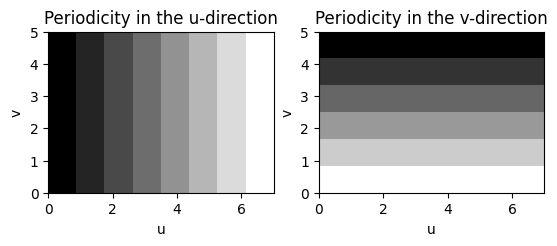

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_periodicity(M, N):
    # Create a grid of frequencies
    u, v = np.meshgrid(np.arange(M), np.arange(N))


    plt.subplot(121)
    plt.imshow(u % M, cmap='gray', extent=(0, M-1, 0, N-1))
    plt.title('Periodicity in the u-direction')
    plt.xlabel('u')
    plt.ylabel('v')


    plt.subplot(122)
    plt.imshow(v % N, cmap='gray', extent=(0, M-1, 0, N-1))
    plt.title('Periodicity in the v-direction')
    plt.xlabel('u')
    plt.ylabel('v')

    plt.show()


M, N = 8, 6  
visualize_periodicity(M, N)


#### Translation

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def translate_image(image, shift):
    M, N = image.shape
    x_shift, y_shift = shift
    shifted_image = np.roll(image, (x_shift, y_shift), axis=(0, 1))    
    return shifted_image

def translate_frequency_domain(fft_result, shift):
    M, N = fft_result.shape
    u_shift, v_shift = shift 
    phase_shift = np.exp(-1j * 2 * np.pi * (u_shift / M + v_shift / N))
    shifted_fft_result = fft_result * phase_shift
    
    return shifted_fft_result

# Example usage
image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

# Choose the amount of shift
shift_amount = (3, 4)

shifted_image_spatial = translate_image(image, shift_amount)

fft_result = fft2(image)


shifted_fft_result = translate_frequency_domain(fft_result, shift_amount)


print(fft_result)


[[136. -0.j  -8. +8.j  -8. -0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. -0.j]
 [-32. -0.j   0. +0.j   0. -0.j   0. -0.j]
 [-32.-32.j   0. +0.j   0. -0.j   0. -0.j]]


In [35]:
shifted_fft_result

array([[-5.82931876e-14+136.j, -8.00000000e+00  -8.j,
         3.42901104e-15  -8.j,  8.00000000e+00  -8.j],
       [-3.20000000e+01 -32.j, -0.00000000e+00  +0.j,
        -0.00000000e+00  +0.j,  0.00000000e+00  +0.j],
       [ 1.37160442e-14 -32.j, -0.00000000e+00  +0.j,
         0.00000000e+00  +0.j,  0.00000000e+00  +0.j],
       [ 3.20000000e+01 -32.j, -0.00000000e+00  +0.j,
         0.00000000e+00  +0.j,  0.00000000e+00  +0.j]])

#### Image filtering in frequency domain

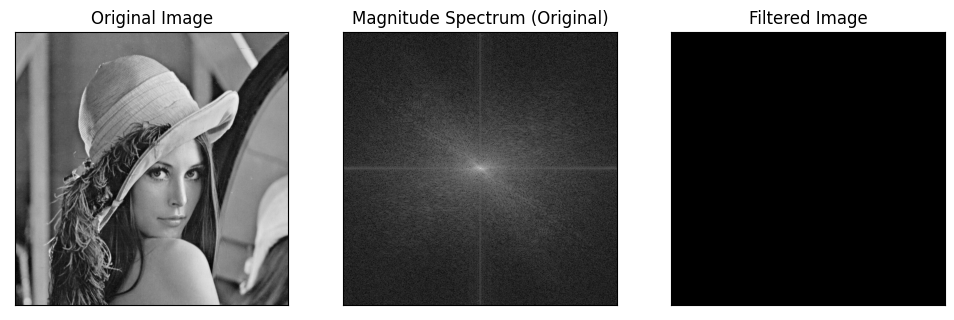

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class GaussianNotchFilter:
    def apply_filter(self, fshift, points, d0):
        m, n = fshift.shape
        u = np.fft.fftfreq(m)
        v = np.fft.fftfreq(n)

        for u0, v0 in points:
            u0_idx = int(u0 * m) % m 
            v0_idx = int(v0 * n) % n
            fshift[u0_idx, v0_idx] = 0  # Set the DC component to 0
            
            # Apply the Gaussian notch filter around the specified point
            for i in range(m):
                for j in range(n):
                    d = np.sqrt((u[i] - u0)**2 + (v[j] - v0)**2)
                    fshift[i, j] =1 

        return fshift


img = plt.imread('lena.png')
gray_img = np.mean(img, axis=-1)

grey = gray_img.copy()

fourier_transform_shifted = np.fft.fftshift(np.fft.fft2(gray_img))

notch_filter = GaussianNotchFilter()



notch_points = [(0, 0), (0, 0)] 
notch_radius = 0.02 


filtered_fshift = notch_filter.apply_filter(grey, notch_points, notch_radius)


filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fshift)))

cv2.imwrite("filtered_image.jpg", filtered_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(gray_img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(np.log(1 + np.abs(fourier_transform_shifted)), cmap='gray')
plt.title('Magnitude Spectrum (Original)'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()


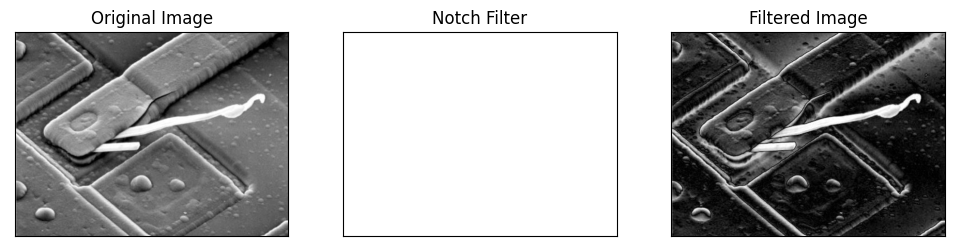

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create a basic notch filter
def create_basic_notch_filter(image_shape, notch_center):
    M, N = image_shape[:2]  # Ensure we take only the first two dimensions
    u, v = np.meshgrid(np.fft.fftfreq(N), np.fft.fftfreq(M))

    notch_filter = np.ones((M, N), dtype=np.uint8)
    
    notch_filter[0, 0] = 0
    
    return notch_filter




def apply_notch_filter(image, notch_filter):
    image_fft = np.fft.fft2(image)
    
    filtered_image_fft = image_fft * notch_filter
    
    filtered_image = np.abs(np.fft.ifft2(filtered_image_fft))
    
    return filtered_image

real_image = cv2.imread("chapter3.jpg", cv2.IMREAD_GRAYSCALE)


notch_center = (0, 0)
notch_filter = create_basic_notch_filter(real_image.shape, notch_center)

filtered_image = apply_notch_filter(real_image, notch_filter)

plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(real_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(notch_filter, cmap='gray')
plt.title('Notch Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()


### low pass and high pass filter

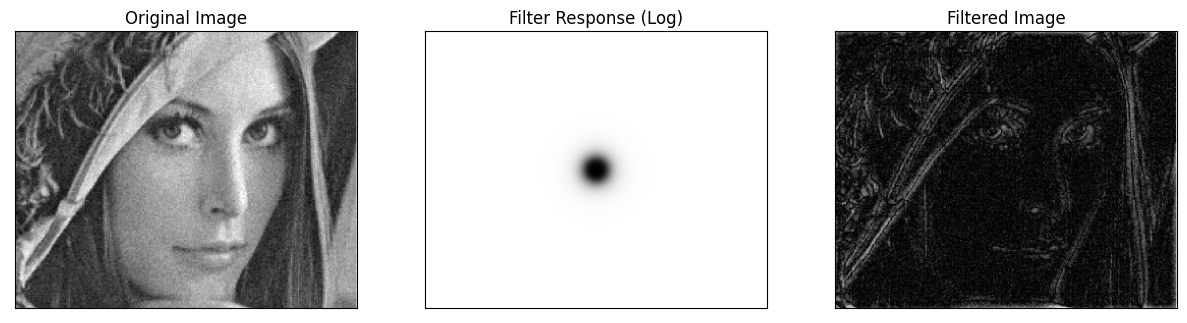

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

def lowpass_filter(shape, d0=160, ftype='butterworth', n=2, u_k=0, v_k=0,sigma=20,L_space=1):
    P, Q = shape
    H = np.zeros((P, Q))

    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - P/2 + u_k)**2 + (v - Q/2 + v_k)**2)

            if ftype == 'ideal':
                if D_uv <= d0:
                    H[u, v] = 1.0

            elif ftype == 'average_book':
                den_u = np.sin(np.pi * u / (2 * L_space + 1)) / np.sin(np.pi * u)
                den_v = np.sin(np.pi * v / (2 * L_space + 1)) / np.sin(np.pi * v)

                # Check for division by zero and set H to 0 in such cases
                H[u, v] = (1 / ((2 * L_space + 1)**2)) * np.where((den_u != 0) & (den_v != 0),
                                                                   den_u * den_v,
                                                                   0)

            elif ftype == 'average': 
                H[u, v] = 1 / (P * Q)
            elif ftype == 'binomial':
                #H[u, v] = 1 / (2**(2 * n) * (1 + np.cos(2 * np.pi * u))**n * (1 + np.cos(2 * np.pi * v))**n)
                H[u, v] = 1 / (1 + (D_uv / d0)**(2 * n))

            elif ftype == 'butterworth':
                H[u, v] = 1 / (1 + (D_uv/d0)**(2*n))

            elif ftype == 'gaussian':
                H[u, v] = np.exp(-D_uv**2 / (2 * sigma**2))

    return H
########## high pass is just inverse of lowpass ##########

def highpass_filter(shape, d0=160, ftype='butterworth', n=2, u_k=0, v_k=0,sigma=20,L_space=1):

	return 1.0 - lowpass_filter(shape, d0, ftype, n,u_k,v_k,sigma,L_space)


def filter_image_freq(img, fclass='lowpass', ftype='butterworth', d0=160, w=20, n=2, u_k=0, v_k=0,sigma=20,L_space = 1):

    M, N = img.shape
    P = 2*M
    Q = 2*N


    F = np.fft.fft2(img, s=(P,Q))


    F = np.fft.fftshift(F)

    pow_spec = np.abs(F)**2
    if fclass =='lowpass':
        
        H = lowpass_filter(F.shape, d0, ftype, n,u_k,v_k,sigma,L_space)
    else:
        H = highpass_filter(F.shape, d0, ftype, n,u_k,v_k,sigma,L_space)
    G = F * H

    G = np.fft.ifftshift(G)

    G = np.fft.ifft2(G)

    G = np.abs(G)

    G = G[0:M, 0:N]

    return G, np.abs(H), np.log(pow_spec)

image = cv2.imread("lowpass_filter.jpg", cv2.IMREAD_GRAYSCALE)


filter_type = 'butterworth' 
cutoff_frequency = 30  #
filter_order = 2  
sigma = 1
L_space = 1

filtered_image, filter_response, log_power_spectrum = filter_image_freq(image,fclass ="highpass", ftype=filter_type, d0=cutoff_frequency, n=filter_order,sigma=sigma,L_space=L_space)

plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(np.log(1 + np.abs(filter_response)), cmap='gray')
plt.title('Filter Response (Log)'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()


### highpass_filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

def lowpass_filter(shape, d0=160, ftype='butterworth', n=2, u_k=0, v_k=0, sigma=20, L_space=1):
    P, Q = shape
    H = np.zeros((P, Q))

    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - P/2 + u_k)**2 + (v - Q/2 + v_k)**2)

            if ftype == 'ideal':
                if D_uv <= d0:
                    H[u, v] = 1.0

            elif ftype == 'average_book':
                den_u = np.sin(np.pi * u * (2 * L_space + 1)) / np.sin(np.pi * u)
                den_v = np.sin(np.pi * v * (2 * L_space + 1)) / np.sin(np.pi * v)

                H[u, v] = (1 / ((2 * L_space + 1)**2)) * den_u * den_v

            elif ftype == 'average':
                H[u, v] = 1 / (P * Q)
            elif ftype == 'binomial':
                H[u, v] = 1 / (1 + (D_uv / d0)**(2 * n))

            elif ftype == 'butterworth':
                H[u, v] = 1 / (1 + (D_uv/d0)**(2*n))

            elif ftype == 'gaussian':
                H[u, v] = np.exp(-D_uv**2 / (2 * sigma**2))

    return H

def highpass_filter(shape, d0=160, ftype='butterworth', n=2, u_k=0, v_k=0, sigma=20, L_space=1):
    return 1.0 - lowpass_filter(shape, d0, ftype, n, u_k, v_k, sigma, L_space)

def filter_image_freq(img, fclass='lowpass', ftype='butterworth', d0=160, w=20, n=2, u_k=0, v_k=0, sigma=20, L_space=1):
    M, N = img.shape
    P = 2 * M
    Q = 2 * N

    F = np.fft.fft2(img, s=(P, Q))
    F = np.fft.fftshift(F)

    pow_spec = np.abs(F)**2
    if fclass == 'lowpass':
        H = lowpass_filter(F.shape, d0, ftype, n, u_k, v_k, sigma, L_space)
    else:
        H = highpass_filter(F.shape, d0, ftype, n, u_k, v_k, sigma, L_space)
    G = F * H

    G = np.fft.ifftshift(G)
    G = np.fft.ifft2(G)
    G = np.abs(G)
    G = G[0:M, 0:N]

    return G, np.abs(H), np.log(pow_spec)

def plot_filter_test(image_path, filter_type,ftype, cutoff_frequency, filter_order, sigma, L_space):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    filtered_image, filter_response, log_power_spectrum = filter_image_freq(
        image, fclass=filter_type, ftype=ftype, d0=cutoff_frequency, n=filter_order, sigma=sigma, L_space=L_space
    )

    plt.figure(figsize=(15, 5))

    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(np.log(1 + np.abs(filter_response)), cmap='gray')
    plt.title('Filter Response (Log)'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image ({filter_type}{ftype})'), plt.xticks([]), plt.yticks([])

    plt.show()

# Test with low-pass filter and different types (ideal, gaussian, butterworth)
plot_filter_test("lowpass_filter.jpg", "lowpass","ideal", 60, 1, 1, 1)
plot_filter_test("lowpass_filter.jpg", "lowpass","gaussian", 30, 1, 30, 1)
plot_filter_test("lowpass_filter.jpg", "lowpass","butterworth", 30, 2, 20, 2)
plot_filter_test("lowpass_filter.jpg", "lowpass","average_book", 30, 1, 20, 3)
plot_filter_test("lowpass_filter.jpg", "lowpass","binomial", 30, 2, 20, 2)



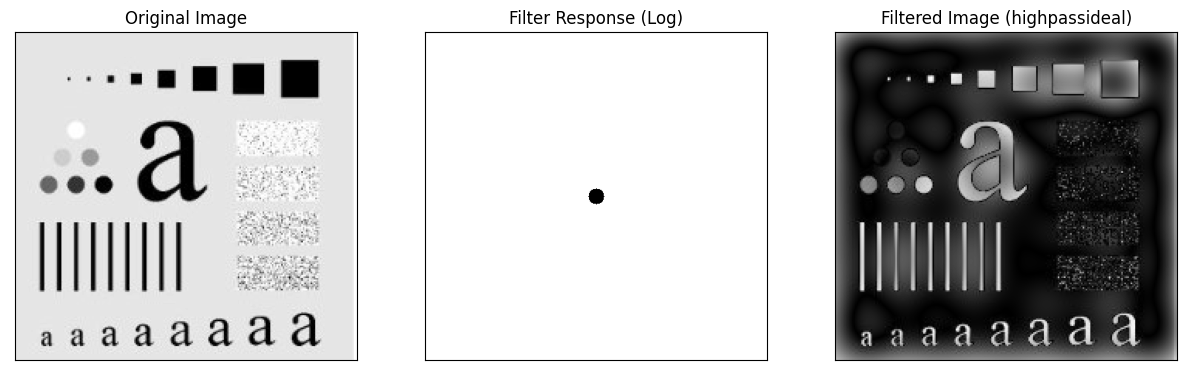

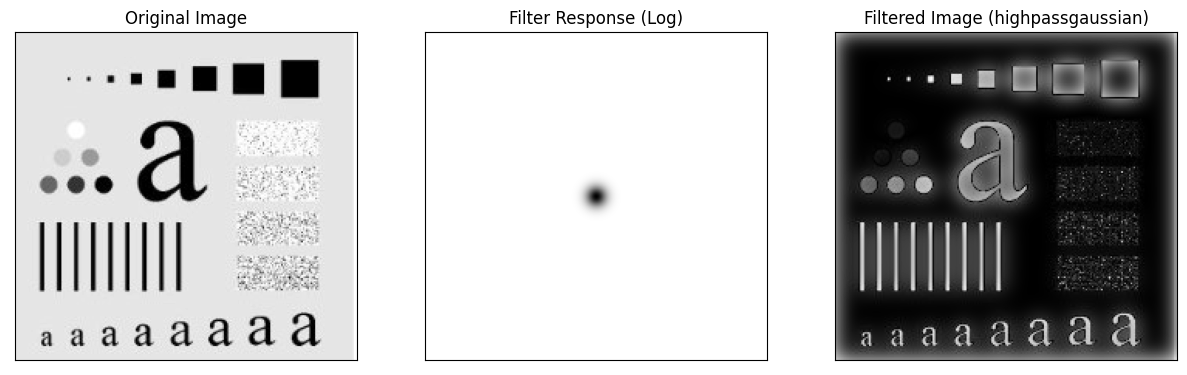

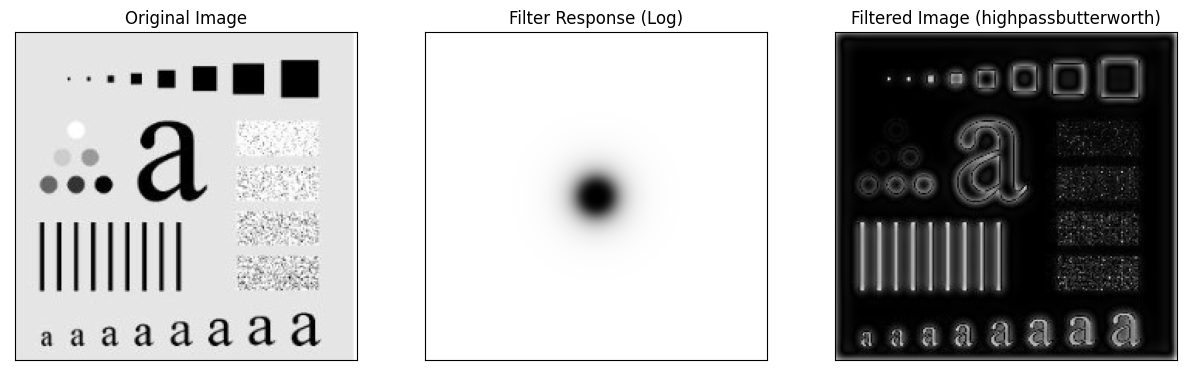

In [31]:
# Test with high-pass filter and different types (ideal, gaussian, butterworth)
plot_filter_test("ideal_lowpass.jpg", "highpass","ideal", 10, 2, 1, 1)
plot_filter_test("ideal_lowpass.jpg", "highpass","gaussian" ,30, 1, 10, 1)
plot_filter_test("ideal_lowpass.jpg", "highpass","butterworth", 30, 2, 20, 2)

#### high boost filter

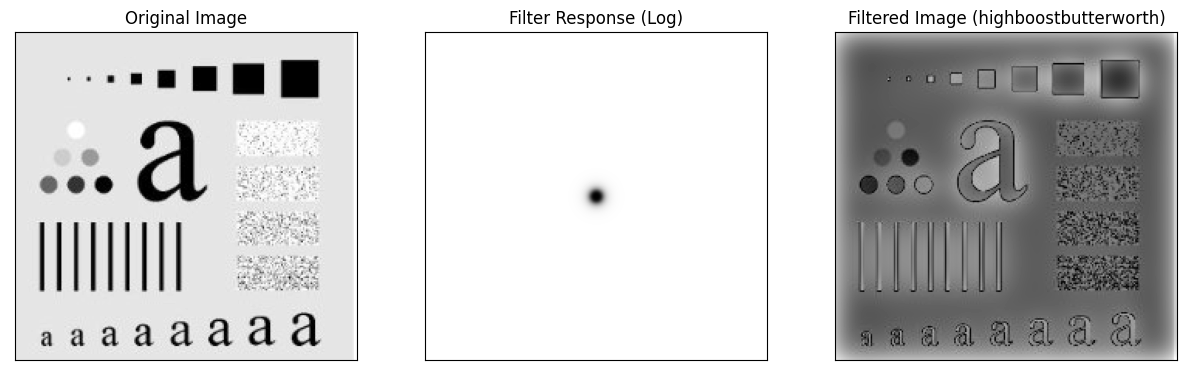

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def highboost_filter(image, sharpening_factor, cutoff_frequency, filter_order):
    M, N = image.shape
    P = 2 * M
    Q = 2 * N

    F = np.fft.fft2(image, s=(P, Q))
    F = np.fft.fftshift(F)

    highpass_filter = np.ones((P, Q))
    u_k, v_k = P // 2, Q // 2
    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - u_k)**2 + (v - v_k)**2)
            highpass_filter[u, v] = 1 / (1 + (cutoff_frequency / D_uv)**(2 * filter_order))


    G = F * highpass_filter

    G = np.fft.ifftshift(G)
    filtered_image = np.abs(np.fft.ifft2(G))
    filtered_image = filtered_image[:M, :N]


    sharpened_image = image + sharpening_factor * (image - filtered_image)

    return sharpened_image, highpass_filter

def high_boost(shape, d0=160, ftype='butterworth', n=2, u_k=0, v_k=0, sigma=20, L_space=1, k = 1):
    H_hp= highpass_filter(shape,d0,ftype,n,u_k,v_k,sigma,L_space)
    return 1 + k* H_hp



def filter_image_freq(img, fclass='lowpass', ftype='butterworth', d0=160, w=20, n=2, u_k=0, v_k=0, sigma=20, L_space=1,k=1):
    M, N = img.shape
    P = 2 * M
    Q = 2 * N

    F = np.fft.fft2(img, s=(P, Q))
    F = np.fft.fftshift(F)

    pow_spec = np.abs(F)**2
    H = high_boost(F.shape, d0, ftype, n, u_k, v_k, sigma, L_space,k)
    G = F * H

    G = np.fft.ifftshift(G)
    G = np.fft.ifft2(G)
    G = np.abs(G)
    G = G[0:M, 0:N]

    return G, np.abs(H), np.log(pow_spec)

def plot_filter_test(image_path, filter_type,ftype, cutoff_frequency, filter_order, sigma, L_space,k):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    filtered_image, filter_response, log_power_spectrum = filter_image_freq(
        image, fclass=filter_type, ftype=ftype, d0=cutoff_frequency, n=filter_order, sigma=sigma, L_space=L_space, k =2
    )

    plt.figure(figsize=(15, 5))

    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(np.log(1 + np.abs(filter_response)), cmap='gray')
    plt.title('Filter Response (Log)'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image ({filter_type}{ftype})'), plt.xticks([]), plt.yticks([])

    plt.show()



plot_filter_test("ideal_lowpass.jpg", "highboost","butterworth", 10, 2, 1, 1,k=2)



### Non-linear filter


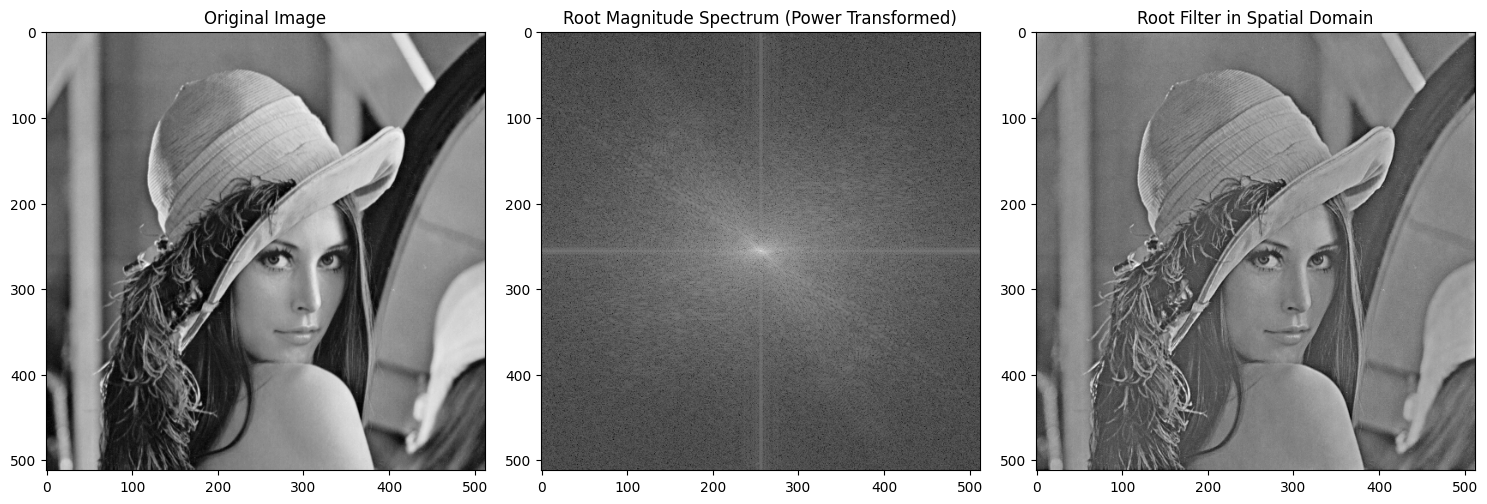

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, fftshift, ifft2

def apply_root_filter(image_path, alpha):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        exit()

    image_fft = fft2(image)
    image_fft_shifted = fftshift(image_fft)

    magnitude_spectrum = np.abs(image_fft_shifted)
    phase_spectrum = np.angle(image_fft_shifted)

    # Apply root filter to the magnitude spectrum with a power transformation
    root_magnitude = np.power(magnitude_spectrum, alpha)

    r_root = root_magnitude
    theta = phase_spectrum

    # Convert polar coordinates back to Cartesian
    root_filter = r_root * np.exp(1j * theta)

    root_filter_spatial = np.real(ifft2(fftshift(root_filter)))

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')

    axs[1].imshow(np.log1p(root_magnitude), cmap='gray')
    axs[1].set_title('Root Magnitude Spectrum (Power Transformed)')

    axs[2].imshow(root_filter_spatial, cmap='gray')
    axs[2].set_title('Root Filter in Spatial Domain')

    plt.tight_layout()
    plt.show()

apply_root_filter('lena.png', alpha=0.8)


#### hormomophic filter

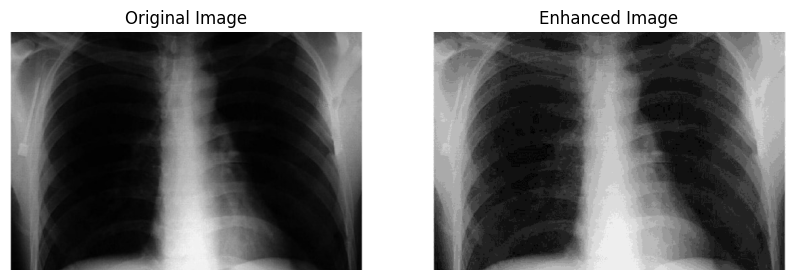

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class HomomorphicFilter:
    def __init__(self, a=0.5, b=1.5, cutoff_frequency=30):
        self.a = a
        self.b = b
        self.cutoff_frequency = cutoff_frequency

    def apply_filter(self, I):
        I_log = np.log1p(np.float32(I))
        I_fft = np.fft.fft2(I_log)

        P, Q = I_fft.shape
        U, V = np.meshgrid(np.fft.fftfreq(Q), np.fft.fftfreq(P))
        Duv = np.sqrt(U**2 + V**2)
        H = (1 - np.exp(-((Duv**2) / (2 * (self.cutoff_frequency**2)))))

        I_fft_filt = (self.a + self.b * H) * I_fft
        I_filt = np.fft.ifft2(I_fft_filt)
        I_enhanced = np.exp(np.real(I_filt)) - 1

        return np.uint8(I_enhanced)


image_path = "hormomophic.jpg"
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


homomorphic_filter = HomomorphicFilter(a=0.5, b=1.25, cutoff_frequency=70)

# Apply homomorphic filtering
enhanced_image = homomorphic_filter.apply_filter(input_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


<>:66: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:80: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:66: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:80: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Windows\Temp\ipykernel_15148\4225352901.py:66: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(I.shape) is not 2:
C:\Windows\Temp\ipykernel_15148\4225352901.py:80: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(H.shape) is not 2:


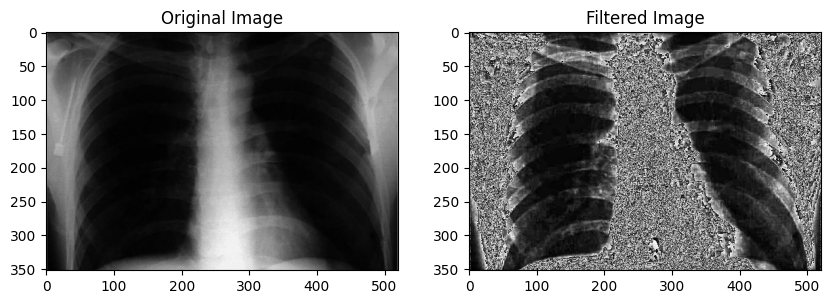

In [110]:
import logging
import numpy as np
import matplotlib.pyplot as plt

# Homomorphic filter class
class HomomorphicFilter:
    """Homomorphic filter implemented with different filters and an option for an external filter.

    High-frequency filters implemented:
        butterworth
        gaussian

    Attributes:
        a, b: Floats used on the emphasis filter:
            H = a + b*H
    """

    def __init__(self, a=0.5, b=1.5):
        self.a = float(a)
        self.b = float(b)

    # Filters
    def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0] / 2
        Q = I_shape[1] / 2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U - P) ** 2 + (V - Q) ** 2)).astype(float)
        H = 1 / (1 + (Duv / filter_params[0] ** 2) ** filter_params[1])
        return (1 - H)

    def __gaussian_filter(self, I_shape, filter_params):
        P = I_shape[0] / 2
        Q = I_shape[1] / 2
        H = np.zeros(I_shape)
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U - P) ** 2 + (V - Q) ** 2)).astype(float)
        H = np.exp((-Duv / (2 * (filter_params[0]) ** 2)))
        return (1 - H)

    # Methods
    def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b * H) * I
        return I_filtered

    def filter(self, I, filter_params, filter='butterworth', H=None):
        """
        Method to apply homomorphic filter on an image

        Attributes:
            I: Single channel image
            filter_params: Parameters to be used on filters:
                butterworth:
                    filter_params[0]: Cutoff frequency 
                    filter_params[1]: Order of filter
                gaussian:
                    filter_params[0]: Cutoff frequency
            filter: Choose of the filter, options:
                butterworth
                gaussian
                external
            H: Used to pass external filter
        """

        # Validating image
        if len(I.shape) is not 2:
            raise Exception('Improper image')

        # Take the image to the log domain and then to the frequency domain
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log)

        # Filters
        if filter == 'butterworth':
            H = self.__butterworth_filter(I_shape=I_fft.shape, filter_params=filter_params)
        elif filter == 'gaussian':
            H = self.__gaussian_filter(I_shape=I_fft.shape, filter_params=filter_params)
        elif filter == 'external':
            print('external')
            if len(H.shape) is not 2:
                raise Exception('Invalid external filter')
        else:
            raise Exception('Selected filter not implemented')

        I_fft_filt = self.__apply_filter(I=I_fft, H=H)
        I_filt = np.fft.ifft2(I_fft_filt)
        I = np.exp(np.real(I_filt))
        return np.uint8(I)


# End of class HomomorphicFilter

if __name__ == "__main__":
    import cv2

    img_path_in = "hormomophic.jpg"


    # Main code
    img = cv2.imread(img_path_in)[:, :, 0]
    homo_filter = HomomorphicFilter(a=1.5, b=1)
    img_filtered = homo_filter.filter(I=img,filter="gaussian", filter_params=[10, 0])

    # Display the original and filtered images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Filtered Image')

    plt.show()
